# NEURAL NETWORK - BANK CHURN - PROJECT

#### Olabode James

### OBJECTIVE: 
Given a Bank customer, build a neural network based classifier that can determine whether they will leave
or not in the next 6 months.

### Context:
Businesses like banks which provide service have to worry about problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### PROJECT PRELIMINARIES

### Import Libraries

In [1]:
import numpy as np
import pandas as pd

#Visualization Components
import seaborn as sns
import matplotlib.pyplot as plt # matplotlib.pyplot plots data
from matplotlib import cm
sns.set(color_codes=True) # adds a nice background to the graphs

# In order to enable plotting graphs in Jupyter notebook
%matplotlib inline

#Scalar and normalization components
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#Performance metrics
from sklearn import metrics
from sklearn.metrics import classification_report
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score

#Having a Baseline model for comparision
from sklearn.linear_model import LogisticRegression

#ANN Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers
from keras.constraints import maxnorm

#For evaluation of the Neural network
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

#Performance Tuning 
from sklearn.model_selection import GridSearchCV

#Need to handle warnings
import warnings
warnings.filterwarnings('ignore')

### 1. Read the dataset

In [2]:
customers = pd.read_csv('bank.csv')

#### Loading and Previewing Dataset

In [3]:
def dataPurityCheck(df):
    #Check for duplicated entries
    print("Result of duplicates check in data:", df.duplicated().any())
    
    #Check for missing values or null entries in data
    print("Result of missing values or null entries check in data:", df.isnull().any().any())
    if(df.isnull().any().any()):
        print("Breakdown of missing values by attributes: \n", round(df.isna().sum()*100/df.shape[0],2))
    
    #Check for non-real entries which passed null checks like symbols etc
    print("Result of Real entry check:\n", df.applymap(np.isreal).any())

In [4]:
customers.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
customers.shape

(10000, 14)

In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
customers.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [8]:
#Checking for purity of the data - using three parameters checks - missing values, duplicates and non-real entries
dataPurityCheck(customers)

Result of duplicates check in data: False
Result of missing values or null entries check in data: False
Result of Real entry check:
 RowNumber           True
CustomerId          True
Surname            False
CreditScore         True
Geography          False
Gender             False
Age                 True
Tenure              True
Balance             True
NumOfProducts       True
HasCrCard           True
IsActiveMember      True
EstimatedSalary     True
Exited              True
dtype: bool


INSIGHT: The dataset is clean, does not contain null, or wrong inputation of data - moving on ...

In [9]:
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [10]:
#Skewness analysis
customers.skew()

RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

### 2. Drop the columns which are unique for all users like IDs (5 points)

In [11]:
#RowNumber and CustomerId are identifiers created by the bank for purpose of sorting and referencing records,  
# - we can drop the columns

customers.drop(['RowNumber'], axis=1, inplace=True)
customers.drop(['CustomerId'], axis=1, inplace=True)

#Surname column will not be relevant for purpose of analysis - we can drop the column
customers.drop(['Surname'], axis=1, inplace=True)

In [12]:
customers.shape

(10000, 11)

### 3. Distinguish the features and target variable (5 points)

#### EDA - Understanding the data attributes

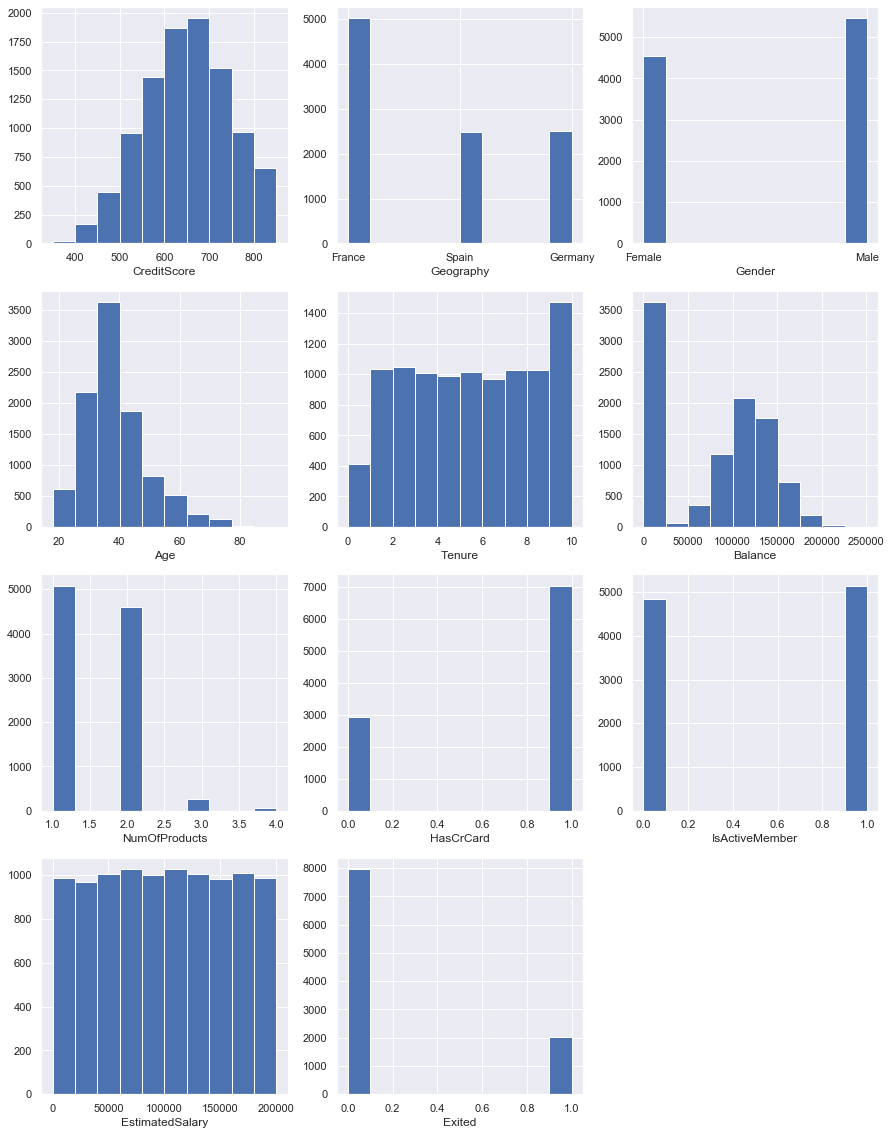

In [13]:
plt.figure(figsize=(15,20))
posHist = 1
for i in customers.columns:
    plt.subplot(4, 3, posHist)
    plt.hist(customers[i])
    plt.xlabel(i)
    posHist += 1 

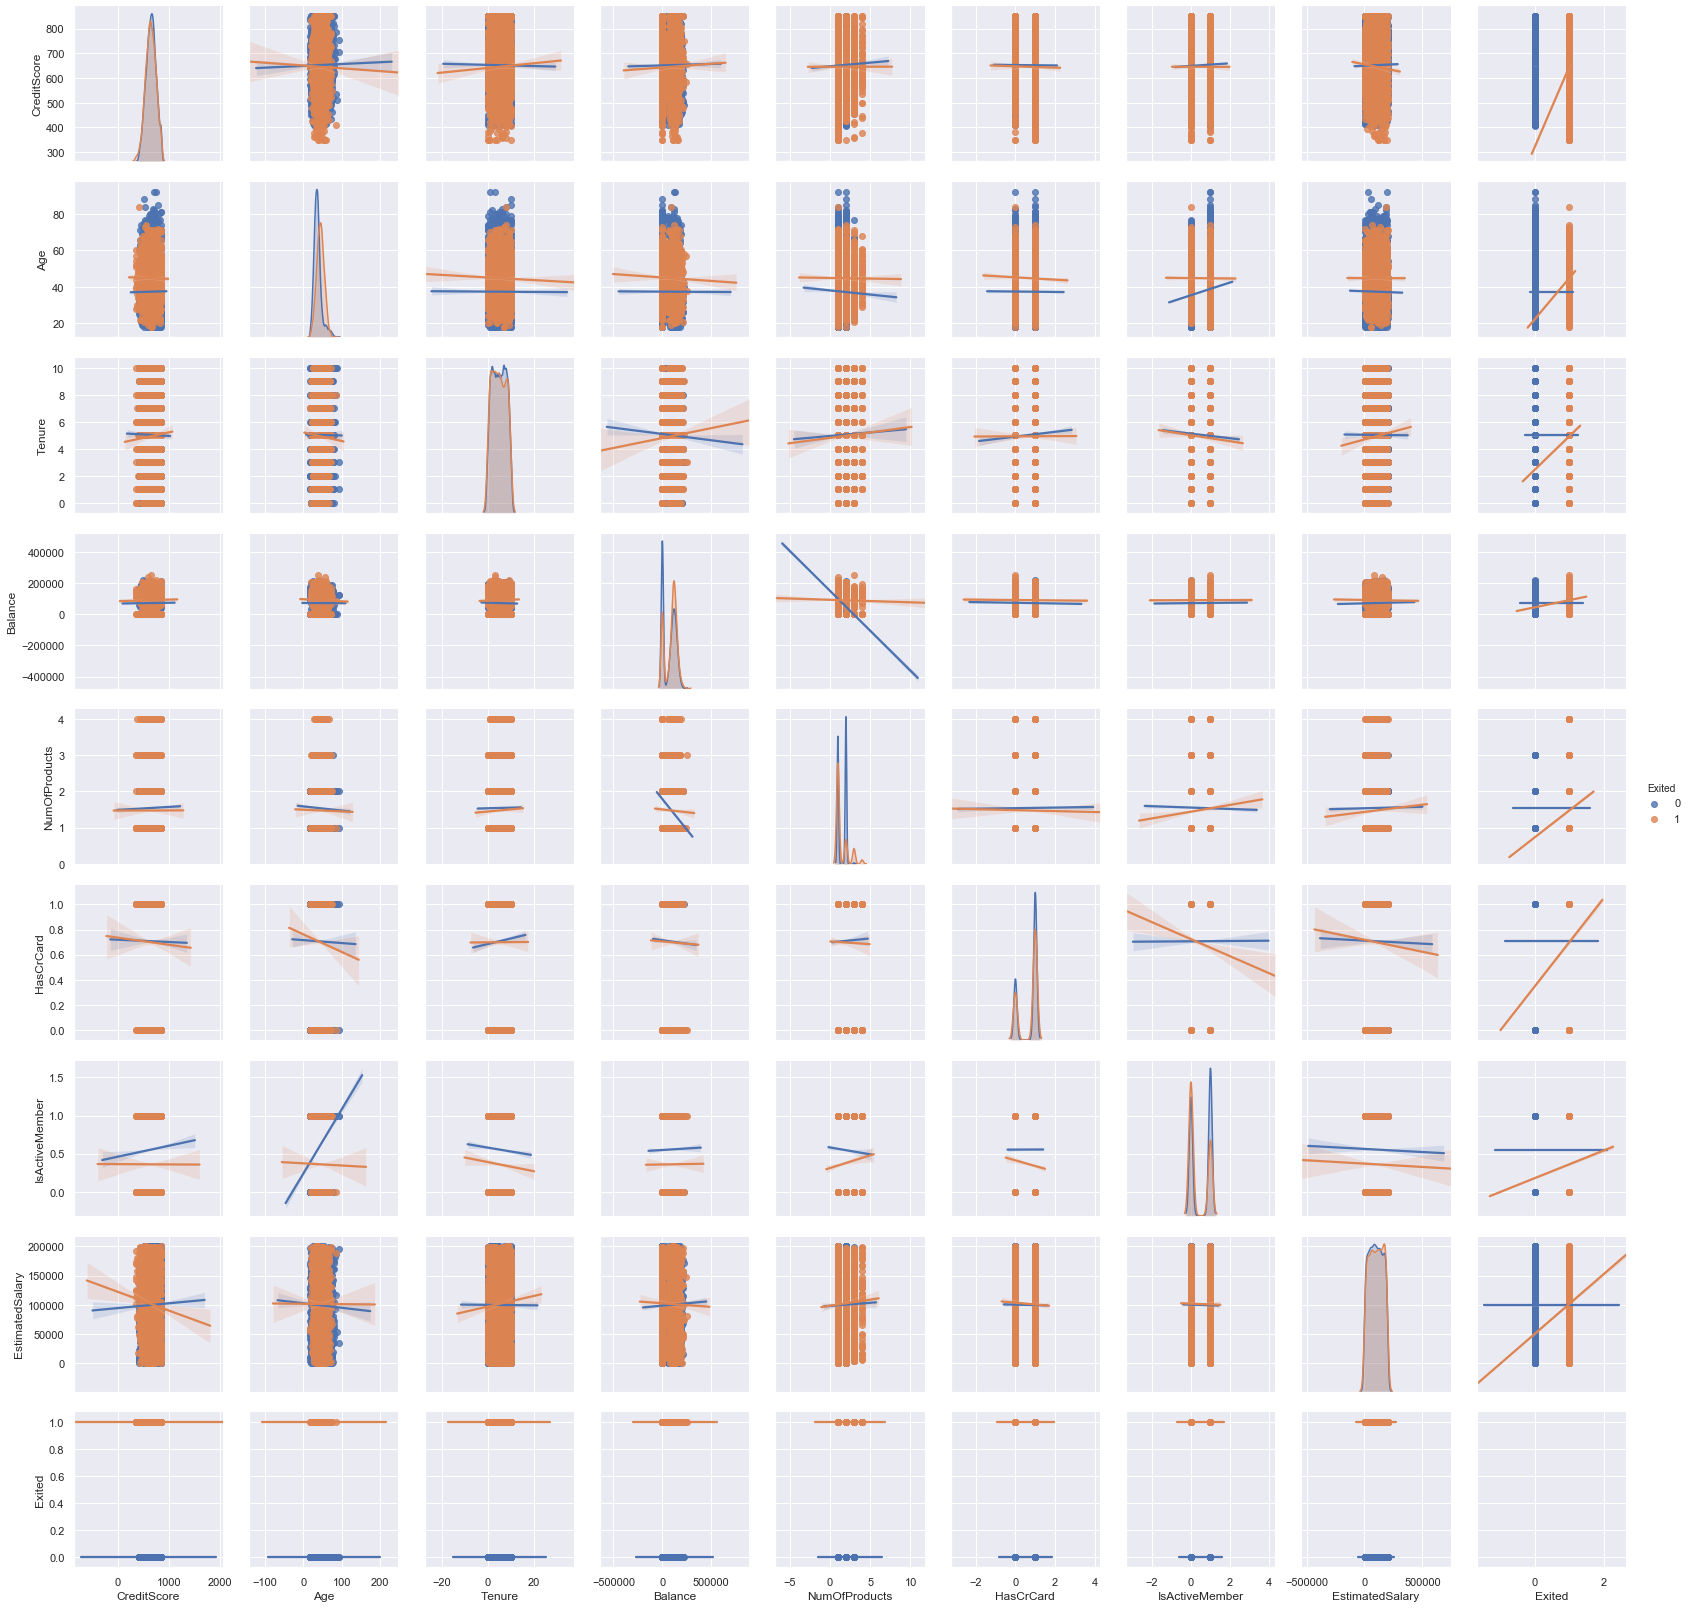

In [14]:
sns.pairplot(customers, hue='Exited', kind='reg')

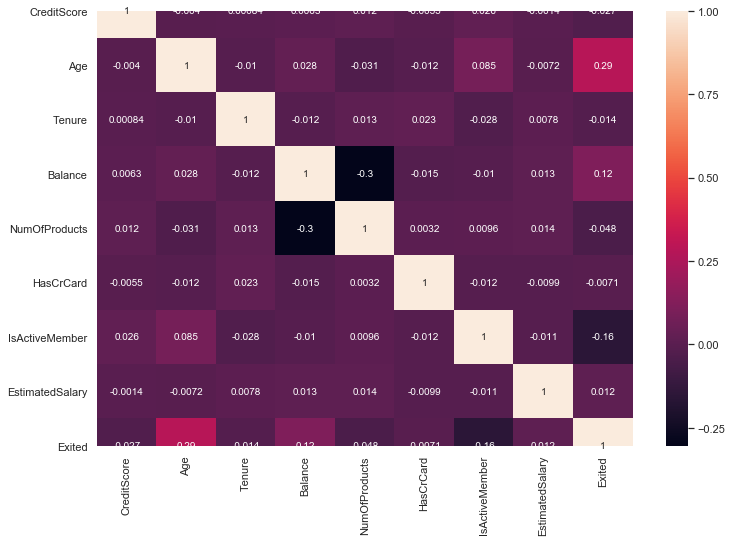

In [15]:
plt.figure(figsize=(12,8))
corr = customers.corr()
sns.heatmap(corr, annot = True)

In [16]:
#Check for multi-collinearity between features 0 using a 0.80 correlation benchmark Lets check for highly correlated variables
cor= customers.corr()
cor.loc[:,:] = np.tril(cor,k=-1)
cor=cor.stack()
cor[(cor > 0.8) | (cor< -0.8)]

Series([], dtype: float64)

INSIGHT: There are no two features which have high collinearity, thus we will leave all the features as is ... moving on

DEDUCTION: Features are: CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary 
Target variable: Exited

10 Features and 1 Target

### 4. Divide the data set into training and test sets (5 points)

In [17]:
X = customers.drop("Exited" , axis=1)
y = customers.pop("Exited")

In [18]:
X.shape, y.shape

((10000, 10), (10000,))

In [19]:
# Need to encode Categorical attributes Geography and Gender
oneHotCols = ["Geography","Gender"]

geography = pd.get_dummies(X['Geography'])
gender = pd.get_dummies(X['Gender'])

X = pd.concat([X, geography, gender], axis=1)
X = X.drop(['Geography','Gender'], axis=1)
X.shape

(10000, 13)

In [20]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

Checking Structure of the train test data

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 13), (2000, 13), (8000,), (2000,))

### 5. Normalize the train and test data (10 points)

In [23]:
scaler = StandardScaler()

In [24]:
X_train = scaler.fit_transform(X_train)

In [25]:
X_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57638802,
        -0.91324755,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ..., -0.57638802,
        -0.91324755,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ...,  1.73494238,
        -0.91324755,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57638802,
         1.09499335, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57638802,
        -0.91324755,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ..., -0.57638802,
        -0.91324755,  0.91324755]])

In [26]:
X_test = scaler.transform(X_test)

In [27]:
X_test

array([[-0.57749609, -0.6557859 , -0.69539349, ..., -0.57638802,
        -0.91324755,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57638802,
        -0.91324755,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ...,  1.73494238,
         1.09499335, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57638802,
         1.09499335, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57638802,
        -0.91324755,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ..., -0.57638802,
        -0.91324755,  0.91324755]])

### 6. Initialize & build the model. Identify the points of improvement and implement the same.(20 points)

In [28]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Exited", "Not Exited"] , yticklabels = ["Exited", "Not Exited"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

#### CREATING BASELINE MODELS BY USING Any of Logit, RFC, XGBoost and LightGBM for Purpose of Evaluation of Performance of the ANN

In [29]:
#Purpose of this sub-section is to establish a performance baseline, Logistic Regression will serve the purpose
logmodel = LogisticRegression(solver="liblinear", penalty='l1') #Default Penalty is l2
lg = logmodel.fit(X_train, y_train)

#predict on test
y_predict = logmodel.predict(X_test)

In [30]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
cm

array([[  79,  314],
       [  63, 1544]])

Trainig accuracy 0.81075

Testing accuracy 0.8115

Recall: 0.2010178117048346

Precision: 0.5563380281690141

F1 Score: 0.29532710280373836

Roc Auc Score: 0.5809071634753171
Confusion Matrix


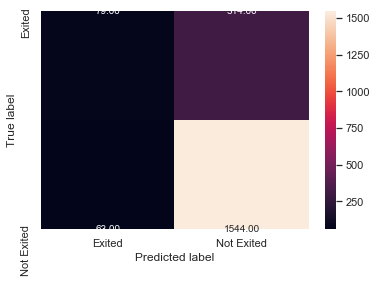

None



In [31]:
print("Trainig accuracy",logmodel.score(X_train,y_train))  
print()
print("Testing accuracy",logmodel.score(X_test, y_test))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()

INSIGHT: From above - we can see that we were able to achieve Accuracy of 0.8115 on a baseline ML model, the goal will now be for us to expect better prediction performance on our ANN model compared to the result from Logistic Regression model.

### Building Neural Network Model 

In [32]:
def performance_params(ann_model):
    Y_pred_cls = ann_model.predict_classes(X_test, batch_size=20, verbose=0)
    print('Test Accuracy Model: '+ str(ann_model.evaluate(X_test,y_test.values)[1]))
    print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_cls)))
    print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_cls)))
    print('F1-score: ' + str(f1_score(y_test.values,Y_pred_cls)))
    confusion_matrix(y_test.values, Y_pred_cls)

### Step 1 - Base Neural Network

In [33]:
#Initializing the neural network
model = Sequential()

#First input layer
model.add(Dense(6, input_shape = (13,), activation = 'relu', kernel_initializer = 'uniform'))

#Adding dropout to mitigate overfit challenge - Regularisation feature
#model.add(Dropout(0.1))

#First hidden layer
model.add(Dense(6, activation = 'relu', kernel_initializer = 'uniform'))
#Regularisation feature
#model.add(Dropout(0.1))

#Output layer
model.add(Dense(1, activation = 'sigmoid'))

In [34]:
adam = optimizers.Adam(lr = 0.001)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 84        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(X_train, y_train.values, batch_size = 20, epochs = 20, verbose = 1)

Epoch 1/20
400/400 [==============================] - 0s 792us/step - loss: 0.5098 - accuracy: 0.7945
Epoch 2/20
400/400 [==============================] - 0s 804us/step - loss: 0.4352 - accuracy: 0.7945
Epoch 3/20
400/400 [==============================] - 0s 798us/step - loss: 0.4269 - accuracy: 0.7945
Epoch 4/20
400/400 [==============================] - 0s 789us/step - loss: 0.4222 - accuracy: 0.8106
Epoch 5/20
400/400 [==============================] - 0s 816us/step - loss: 0.4196 - accuracy: 0.8269
Epoch 6/20
400/400 [==============================] - 0s 1ms/step - loss: 0.4174 - accuracy: 0.8300
Epoch 7/20
400/400 [==============================] - 0s 787us/step - loss: 0.4159 - accuracy: 0.8315
Epoch 8/20
400/400 [==============================] - 0s 902us/step - loss: 0.4144 - accuracy: 0.8310
Epoch 9/20
400/400 [==============================] - 0s 843us/step - loss: 0.4136 - accuracy: 0.8309
Epoch 10/20
400/400 [==============================] - 0s 775us/step - loss: 0.4126 

### INSIGHT: We achieved 0.8366 on accuracy which is better than the base ML model(logistic regression)

In [37]:
performance_params(model)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
63/63 [==============================] - 0s 888us/step - loss: 0.3922 - accuracy: 0.8375
Test Accuracy Model: 0.8374999761581421
Recall_score: 0.3155216284987277
Precision_score: 0.6888888888888889
F1-score: 0.4328097731239093


#### INSIGHT: Significantly better result than our base line model - now lets improve this model using dropout and layer weights regularization techniques

### Step 2 - REGULARIZATION: Improving the Base Neural Network with dropout, denser hidden layers and weight constraints

In [38]:
#Initializing the neural network
model2 = Sequential()

#First input layer
model2.add(Dense(6, input_shape = (13,), activation = 'relu', kernel_initializer = 'uniform', kernel_constraint=maxnorm(3)))

#Adding dropout to mitigate overfit challenge - Regularisation feature
model2.add(Dropout(0.1))

#First hidden layer
model2.add(Dense(6, activation = 'relu', kernel_initializer = 'uniform', kernel_constraint=maxnorm(3)))
#Regularisation feature
model2.add(Dropout(0.1))

#Output layer
model2.add(Dense(1, activation = 'sigmoid'))

In [39]:
adam = optimizers.Adam(lr = 0.001)
model2.compile(optimizer = adam, loss = 'binary_crossentropy', metrics=['accuracy'])

In [40]:
model2.fit(X_train, y_train.values, batch_size = 20, epochs = 20, verbose = 1)

Epoch 1/20
400/400 [==============================] - 1s 1ms/step - loss: 0.5710 - accuracy: 0.7929
Epoch 2/20
400/400 [==============================] - 1s 1ms/step - loss: 0.4414 - accuracy: 0.8119
Epoch 3/20
400/400 [==============================] - 0s 865us/step - loss: 0.4269 - accuracy: 0.8180
Epoch 4/20
400/400 [==============================] - 0s 987us/step - loss: 0.4254 - accuracy: 0.8200
Epoch 5/20
400/400 [==============================] - 0s 861us/step - loss: 0.4172 - accuracy: 0.8213
Epoch 6/20
400/400 [==============================] - 0s 872us/step - loss: 0.4159 - accuracy: 0.8207
Epoch 7/20
400/400 [==============================] - 0s 974us/step - loss: 0.4153 - accuracy: 0.8207
Epoch 8/20
400/400 [==============================] - 0s 876us/step - loss: 0.4110 - accuracy: 0.8200
Epoch 9/20
400/400 [==============================] - 0s 873us/step - loss: 0.4103 - accuracy: 0.8201
Epoch 10/20
400/400 [==============================] - 0s 887us/step - loss: 0.4105 - 

### INSIGHT: Model2 Peaked at 0.8389 after 20 epoch, slightly better than Base ANN Model.

In [41]:
#Fetch Model Performance Data
performance_params(model2)

63/63 [==============================] - 0s 1ms/step - loss: 0.3610 - accuracy: 0.8500
Test Accuracy Model: 0.8500000238418579
Recall_score: 0.3893129770992366
Precision_score: 0.7183098591549296
F1-score: 0.504950495049505


#### INSIGHT: Precision, Recall and F1 score results improved as a result of regularization and introduction of dropout and layer weights management. This is as expected.

### Step 3: Using Cross-validation to find the best stopping epoch in which diminishing returns is experienced - that is, when the ANN start overfitting the training data

In [42]:
def create_model():
    ann_model = Sequential()
    ann_model.add(Dense(6, input_shape = (13,), activation = 'relu', kernel_initializer = 'uniform'))
    ann_model.add(Dropout(0.1))
    ann_model.add(Dense(6, activation = 'relu', kernel_initializer = 'uniform'))
    ann_model.add(Dropout(0.1))
    ann_model.add(Dense(1, activation = 'sigmoid'))
    adam = optimizers.Adam(lr = 0.001)
    ann_model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics=['accuracy'])
    return model

In [45]:
# We will keep the connected nodes at 6
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_model, epochs=20, batch_size=20, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)

results = cross_val_score(pipeline, X, y, cv=kfold)
print("Cross validation result(Mean vis-a-vis Variance): %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Cross validation result(Mean vis-a-vis Variance): 83.85% (0.69%)


### INSIGHT: The low variance is a desireable, and high mean accuracy is within the margin of earlier model. We can conclude we have a good model architecture.

### Step 4: Using Cross Validation to fetch best Stopping Training Epoch where model begins to start overfitting the training data - in order to balance Loss and Accuracy

In [46]:
#model is trained over 20 epochs
model3 = create_model()
model3 = model3.fit(X_train, y_train.values ,validation_split=0.1, batch_size = 20, epochs = 20)

Epoch 1/20
360/360 [==============================] - 0s 1ms/step - loss: 0.3950 - accuracy: 0.8397 - val_loss: 0.3851 - val_accuracy: 0.8425
Epoch 2/20
360/360 [==============================] - 0s 987us/step - loss: 0.3939 - accuracy: 0.8397 - val_loss: 0.3855 - val_accuracy: 0.8388
Epoch 3/20
360/360 [==============================] - 0s 1ms/step - loss: 0.3949 - accuracy: 0.8400 - val_loss: 0.3882 - val_accuracy: 0.8388
Epoch 4/20
360/360 [==============================] - 0s 1ms/step - loss: 0.3940 - accuracy: 0.8394 - val_loss: 0.3901 - val_accuracy: 0.8413
Epoch 5/20
360/360 [==============================] - 0s 989us/step - loss: 0.3947 - accuracy: 0.8401 - val_loss: 0.3888 - val_accuracy: 0.8400
Epoch 6/20
360/360 [==============================] - 0s 1ms/step - loss: 0.3938 - accuracy: 0.8413 - val_loss: 0.3879 - val_accuracy: 0.8413
Epoch 7/20
360/360 [==============================] - 0s 1ms/step - loss: 0.3943 - accuracy: 0.8400 - val_loss: 0.3882 - val_accuracy: 0.8400
Ep

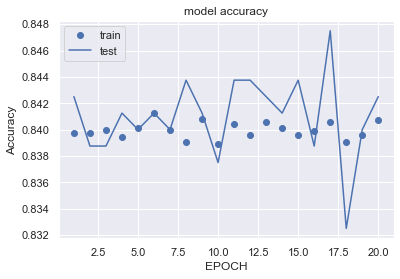

In [49]:
#Accuracy vs Value Accuracy
model3.history.keys()

acc = model3.history['accuracy']
val_acc = model3.history['val_accuracy']

epochs = range(1, len(acc) + 1)

# summarize history for accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Test acc')
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('EPOCH')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

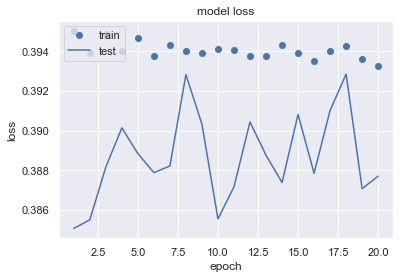

In [50]:
#loss vs val loss
plt.clf()   # clear figure
loss = model3.history['loss']
val_loss = model3.history['val_loss']

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### INSIGHT: Large training epochs will not necessarily improve the performance of our model.

### Step 5: Implementing GridSearch To Find Best Hyper-parameter For Tuning of the ANN model

In [51]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, input_shape = (13,),kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [52]:
classifier = KerasClassifier(build_fn = build_classifier)


parameters = {'batch_size': [20, 40],
              'epochs': [10, 20],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)

In [53]:
grid_search = grid_search.fit(X_train, y_train)

Epoch 1/10
360/360 [==============================] - 0s 805us/step - loss: 0.5506 - accuracy: 0.7925
Epoch 2/10
360/360 [==============================] - 0s 814us/step - loss: 0.4408 - accuracy: 0.7933
Epoch 3/10
360/360 [==============================] - 0s 798us/step - loss: 0.4352 - accuracy: 0.7933
Epoch 4/10
360/360 [==============================] - 0s 804us/step - loss: 0.4322 - accuracy: 0.7933
Epoch 5/10
360/360 [==============================] - 0s 800us/step - loss: 0.4298 - accuracy: 0.7933
Epoch 6/10
360/360 [==============================] - 0s 796us/step - loss: 0.4271 - accuracy: 0.7933
Epoch 7/10
360/360 [==============================] - 0s 802us/step - loss: 0.4244 - accuracy: 0.8065
Epoch 8/10
360/360 [==============================] - 0s 807us/step - loss: 0.4225 - accuracy: 0.8201
Epoch 9/10
360/360 [==============================] - 0s 804us/step - loss: 0.4209 - accuracy: 0.8238
Epoch 10/10
360/360 [==============================] - 0s 799us/step - loss: 0.419

360/360 [==============================] - 0s 777us/step - loss: 0.5279 - accuracy: 0.7946
Epoch 2/10
360/360 [==============================] - 0s 770us/step - loss: 0.4341 - accuracy: 0.7946
Epoch 3/10
360/360 [==============================] - 0s 778us/step - loss: 0.4290 - accuracy: 0.7946
Epoch 4/10
360/360 [==============================] - 0s 764us/step - loss: 0.4261 - accuracy: 0.7946
Epoch 5/10
360/360 [==============================] - 0s 770us/step - loss: 0.4235 - accuracy: 0.7992
Epoch 6/10
360/360 [==============================] - 0s 772us/step - loss: 0.4218 - accuracy: 0.8239
Epoch 7/10
360/360 [==============================] - 0s 785us/step - loss: 0.4190 - accuracy: 0.8268
Epoch 8/10
360/360 [==============================] - 0s 769us/step - loss: 0.4175 - accuracy: 0.8279
Epoch 9/10
360/360 [==============================] - 0s 974us/step - loss: 0.4149 - accuracy: 0.8283
Epoch 10/10
360/360 [==============================] - 0s 784us/step - loss: 0.4119 - accurac

360/360 [==============================] - 0s 861us/step - loss: 0.6044 - accuracy: 0.7926
Epoch 2/10
360/360 [==============================] - 0s 945us/step - loss: 0.4618 - accuracy: 0.7943
Epoch 3/10
360/360 [==============================] - 0s 805us/step - loss: 0.4440 - accuracy: 0.7943
Epoch 4/10
360/360 [==============================] - 0s 748us/step - loss: 0.4371 - accuracy: 0.7943
Epoch 5/10
360/360 [==============================] - 0s 746us/step - loss: 0.4331 - accuracy: 0.7943
Epoch 6/10
360/360 [==============================] - 0s 747us/step - loss: 0.4303 - accuracy: 0.7943
Epoch 7/10
360/360 [==============================] - 0s 772us/step - loss: 0.4281 - accuracy: 0.7943
Epoch 8/10
360/360 [==============================] - 0s 755us/step - loss: 0.4257 - accuracy: 0.7943
Epoch 9/10
360/360 [==============================] - 0s 902us/step - loss: 0.4235 - accuracy: 0.7943
Epoch 10/10
360/360 [==============================] - 0s 918us/step - loss: 0.4218 - accurac

360/360 [==============================] - 0s 831us/step - loss: 0.5367 - accuracy: 0.7957
Epoch 2/20
360/360 [==============================] - 0s 775us/step - loss: 0.4344 - accuracy: 0.7968
Epoch 3/20
360/360 [==============================] - 0s 786us/step - loss: 0.4273 - accuracy: 0.7968
Epoch 4/20
360/360 [==============================] - 0s 903us/step - loss: 0.4228 - accuracy: 0.7982
Epoch 5/20
360/360 [==============================] - 0s 814us/step - loss: 0.4180 - accuracy: 0.8222
Epoch 6/20
360/360 [==============================] - 0s 786us/step - loss: 0.4134 - accuracy: 0.8297
Epoch 7/20
360/360 [==============================] - 0s 773us/step - loss: 0.4095 - accuracy: 0.8328
Epoch 8/20
360/360 [==============================] - 0s 768us/step - loss: 0.4063 - accuracy: 0.8375
Epoch 9/20
360/360 [==============================] - 0s 765us/step - loss: 0.4040 - accuracy: 0.8364
Epoch 10/20
360/360 [==============================] - 0s 828us/step - loss: 0.4016 - accurac

360/360 [==============================] - 0s 785us/step - loss: 0.4145 - accuracy: 0.8344
Epoch 20/20
360/360 [==============================] - 0s 869us/step - loss: 0.4144 - accuracy: 0.8335
Epoch 1/20
360/360 [==============================] - 0s 897us/step - loss: 0.5447 - accuracy: 0.7933
Epoch 2/20
360/360 [==============================] - 0s 901us/step - loss: 0.4319 - accuracy: 0.7943
Epoch 3/20
360/360 [==============================] - 0s 966us/step - loss: 0.4230 - accuracy: 0.7943
Epoch 4/20
360/360 [==============================] - 0s 862us/step - loss: 0.4176 - accuracy: 0.7943
Epoch 5/20
360/360 [==============================] - 0s 932us/step - loss: 0.4119 - accuracy: 0.7943
Epoch 6/20
360/360 [==============================] - 0s 801us/step - loss: 0.4060 - accuracy: 0.8086
Epoch 7/20
360/360 [==============================] - 0s 810us/step - loss: 0.4004 - accuracy: 0.8229
Epoch 8/20
360/360 [==============================] - 0s 788us/step - loss: 0.3947 - accurac

360/360 [==============================] - 0s 805us/step - loss: 0.4000 - accuracy: 0.8358
Epoch 19/20
360/360 [==============================] - 0s 838us/step - loss: 0.3995 - accuracy: 0.8369
Epoch 20/20
360/360 [==============================] - 0s 863us/step - loss: 0.3996 - accuracy: 0.8364
Epoch 1/20
360/360 [==============================] - 0s 831us/step - loss: 0.5880 - accuracy: 0.7919
Epoch 2/20
360/360 [==============================] - 0s 831us/step - loss: 0.4544 - accuracy: 0.7933
Epoch 3/20
360/360 [==============================] - 0s 815us/step - loss: 0.4367 - accuracy: 0.7933
Epoch 4/20
360/360 [==============================] - 0s 769us/step - loss: 0.4297 - accuracy: 0.8028
Epoch 5/20
360/360 [==============================] - 0s 857us/step - loss: 0.4248 - accuracy: 0.8183
Epoch 6/20
360/360 [==============================] - 0s 843us/step - loss: 0.4204 - accuracy: 0.8214
Epoch 7/20
360/360 [==============================] - 0s 931us/step - loss: 0.4162 - accura

360/360 [==============================] - 0s 785us/step - loss: 0.4013 - accuracy: 0.83610s - loss: 0.4120 - accuracy: 
Epoch 18/20
360/360 [==============================] - 0s 867us/step - loss: 0.4009 - accuracy: 0.8350
Epoch 19/20
360/360 [==============================] - 0s 921us/step - loss: 0.4001 - accuracy: 0.8344
Epoch 20/20
360/360 [==============================] - 0s 824us/step - loss: 0.3996 - accuracy: 0.8379
Epoch 1/20
360/360 [==============================] - 0s 846us/step - loss: 0.5746 - accuracy: 0.7937
Epoch 2/20
360/360 [==============================] - 0s 1ms/step - loss: 0.4497 - accuracy: 0.7949
Epoch 3/20
360/360 [==============================] - 0s 942us/step - loss: 0.4387 - accuracy: 0.7949
Epoch 4/20
360/360 [==============================] - 0s 1ms/step - loss: 0.4342 - accuracy: 0.7949
Epoch 5/20
360/360 [==============================] - 1s 2ms/step - loss: 0.4316 - accuracy: 0.7949
Epoch 6/20
360/360 [==============================] - 1s 2ms/step 

360/360 [==============================] - 0s 766us/step - loss: 0.4052 - accuracy: 0.8378
Epoch 18/20
360/360 [==============================] - 0s 748us/step - loss: 0.4051 - accuracy: 0.8358
Epoch 19/20
360/360 [==============================] - 0s 755us/step - loss: 0.4040 - accuracy: 0.8372
Epoch 20/20
360/360 [==============================] - 0s 765us/step - loss: 0.4039 - accuracy: 0.8368
Epoch 1/20
360/360 [==============================] - 0s 736us/step - loss: 0.5520 - accuracy: 0.7940
Epoch 2/20
360/360 [==============================] - 0s 868us/step - loss: 0.4439 - accuracy: 0.7946
Epoch 3/20
360/360 [==============================] - 0s 736us/step - loss: 0.4344 - accuracy: 0.7946
Epoch 4/20
360/360 [==============================] - 0s 758us/step - loss: 0.4296 - accuracy: 0.7946
Epoch 5/20
360/360 [==============================] - 0s 756us/step - loss: 0.4259 - accuracy: 0.7946
Epoch 6/20
360/360 [==============================] - 0s 755us/step - loss: 0.4227 - accur

180/180 [==============================] - 0s 835us/step - loss: 0.4281 - accuracy: 0.7989
Epoch 8/10
180/180 [==============================] - 0s 806us/step - loss: 0.4254 - accuracy: 0.8157
Epoch 9/10
180/180 [==============================] - 0s 822us/step - loss: 0.4222 - accuracy: 0.8238
Epoch 10/10
180/180 [==============================] - 0s 786us/step - loss: 0.4187 - accuracy: 0.8279
Epoch 1/10
180/180 [==============================] - 0s 792us/step - loss: 0.6073 - accuracy: 0.7937
Epoch 2/10
180/180 [==============================] - 0s 796us/step - loss: 0.4539 - accuracy: 0.7949
Epoch 3/10
180/180 [==============================] - 0s 796us/step - loss: 0.4395 - accuracy: 0.7949
Epoch 4/10
180/180 [==============================] - 0s 813us/step - loss: 0.4358 - accuracy: 0.7949
Epoch 5/10
180/180 [==============================] - 0s 793us/step - loss: 0.4332 - accuracy: 0.7949
Epoch 6/10
180/180 [==============================] - 0s 832us/step - loss: 0.4304 - accurac

180/180 [==============================] - 0s 762us/step - loss: 0.4320 - accuracy: 0.7947
Epoch 8/10
180/180 [==============================] - 0s 893us/step - loss: 0.4304 - accuracy: 0.7947
Epoch 9/10
180/180 [==============================] - 0s 889us/step - loss: 0.4284 - accuracy: 0.7947
Epoch 10/10
180/180 [==============================] - 0s 1ms/step - loss: 0.4266 - accuracy: 0.7947
Epoch 1/10
180/180 [==============================] - 0s 795us/step - loss: 0.6141 - accuracy: 0.7965
Epoch 2/10
180/180 [==============================] - 0s 823us/step - loss: 0.4641 - accuracy: 0.7968
Epoch 3/10
180/180 [==============================] - 0s 776us/step - loss: 0.4414 - accuracy: 0.7968
Epoch 4/10
180/180 [==============================] - 0s 912us/step - loss: 0.4346 - accuracy: 0.7968
Epoch 5/10
180/180 [==============================] - 0s 941us/step - loss: 0.4308 - accuracy: 0.7968
Epoch 6/10
180/180 [==============================] - 0s 1ms/step - loss: 0.4282 - accuracy: 0

180/180 [==============================] - 0s 1ms/step - loss: 0.4171 - accuracy: 0.7935
Epoch 8/10
180/180 [==============================] - 0s 786us/step - loss: 0.4129 - accuracy: 0.7986
Epoch 9/10
180/180 [==============================] - 0s 829us/step - loss: 0.4087 - accuracy: 0.8239
Epoch 10/10
180/180 [==============================] - 0s 886us/step - loss: 0.4047 - accuracy: 0.8256
Epoch 1/20
180/180 [==============================] - 0s 806us/step - loss: 0.6348 - accuracy: 0.7901
Epoch 2/20
180/180 [==============================] - 0s 815us/step - loss: 0.4656 - accuracy: 0.7933
Epoch 3/20
180/180 [==============================] - 0s 814us/step - loss: 0.4291 - accuracy: 0.8001
Epoch 4/20
180/180 [==============================] - 0s 792us/step - loss: 0.4111 - accuracy: 0.8108
Epoch 5/20
180/180 [==============================] - 0s 959us/step - loss: 0.3975 - accuracy: 0.8147
Epoch 6/20
180/180 [==============================] - 0s 899us/step - loss: 0.3874 - accuracy:

180/180 [==============================] - 0s 806us/step - loss: 0.3798 - accuracy: 0.8419
Epoch 18/20
180/180 [==============================] - 0s 803us/step - loss: 0.3760 - accuracy: 0.8432
Epoch 19/20
180/180 [==============================] - 0s 793us/step - loss: 0.3721 - accuracy: 0.8460
Epoch 20/20
180/180 [==============================] - 0s 793us/step - loss: 0.3692 - accuracy: 0.8496
Epoch 1/20
180/180 [==============================] - 0s 798us/step - loss: 0.6321 - accuracy: 0.7946
Epoch 2/20
180/180 [==============================] - 0s 833us/step - loss: 0.4603 - accuracy: 0.7954
Epoch 3/20
180/180 [==============================] - 0s 802us/step - loss: 0.4310 - accuracy: 0.8104
Epoch 4/20
180/180 [==============================] - 0s 824us/step - loss: 0.4219 - accuracy: 0.8189
Epoch 5/20
180/180 [==============================] - 0s 833us/step - loss: 0.4153 - accuracy: 0.8224
Epoch 6/20
180/180 [==============================] - 0s 816us/step - loss: 0.4095 - accur

180/180 [==============================] - 0s 1ms/step - loss: 0.3713 - accuracy: 0.8467
Epoch 18/20
180/180 [==============================] - 0s 820us/step - loss: 0.3687 - accuracy: 0.8483
Epoch 19/20
180/180 [==============================] - 0s 777us/step - loss: 0.3662 - accuracy: 0.8507
Epoch 20/20
180/180 [==============================] - 0s 798us/step - loss: 0.3634 - accuracy: 0.8515
Epoch 1/20
180/180 [==============================] - 0s 791us/step - loss: 0.5997 - accuracy: 0.7935
Epoch 2/20
180/180 [==============================] - 0s 776us/step - loss: 0.4481 - accuracy: 0.7946
Epoch 3/20
180/180 [==============================] - 0s 782us/step - loss: 0.4391 - accuracy: 0.7946
Epoch 4/20
180/180 [==============================] - 0s 803us/step - loss: 0.4359 - accuracy: 0.7946
Epoch 5/20
180/180 [==============================] - 0s 786us/step - loss: 0.4341 - accuracy: 0.7946
Epoch 6/20
180/180 [==============================] - 0s 811us/step - loss: 0.4330 - accurac

180/180 [==============================] - 0s 964us/step - loss: 0.4140 - accuracy: 0.8310
Epoch 18/20
180/180 [==============================] - 0s 1ms/step - loss: 0.4139 - accuracy: 0.8310
Epoch 19/20
180/180 [==============================] - 0s 1ms/step - loss: 0.4133 - accuracy: 0.8326
Epoch 20/20
180/180 [==============================] - 0s 869us/step - loss: 0.4129 - accuracy: 0.8324
Epoch 1/20
180/180 [==============================] - 0s 1ms/step - loss: 0.6156 - accuracy: 0.7958
Epoch 2/20
180/180 [==============================] - 0s 943us/step - loss: 0.4633 - accuracy: 0.7968
Epoch 3/20
180/180 [==============================] - 0s 963us/step - loss: 0.4401 - accuracy: 0.7968
Epoch 4/20
180/180 [==============================] - 0s 1ms/step - loss: 0.4340 - accuracy: 0.7968
Epoch 5/20
180/180 [==============================] - 0s 1ms/step - loss: 0.4305 - accuracy: 0.7968
Epoch 6/20
180/180 [==============================] - 0s 903us/step - loss: 0.4280 - accuracy: 0.796

180/180 [==============================] - 0s 760us/step - loss: 0.4197 - accuracy: 0.8304
Epoch 18/20
180/180 [==============================] - 0s 769us/step - loss: 0.4189 - accuracy: 0.8317
Epoch 19/20
180/180 [==============================] - 0s 910us/step - loss: 0.4180 - accuracy: 0.8310
Epoch 20/20
180/180 [==============================] - 0s 870us/step - loss: 0.4173 - accuracy: 0.8325
Epoch 1/20
180/180 [==============================] - 0s 848us/step - loss: 0.6543 - accuracy: 0.7921
Epoch 2/20
180/180 [==============================] - 0s 767us/step - loss: 0.5467 - accuracy: 0.7943
Epoch 3/20
180/180 [==============================] - 0s 755us/step - loss: 0.4635 - accuracy: 0.7943
Epoch 4/20
180/180 [==============================] - 0s 743us/step - loss: 0.4418 - accuracy: 0.7953
Epoch 5/20
180/180 [==============================] - 0s 785us/step - loss: 0.4336 - accuracy: 0.8057
Epoch 6/20
180/180 [==============================] - 0s 771us/step - loss: 0.4294 - accur

180/180 [==============================] - 0s 1ms/step - loss: 0.4094 - accuracy: 0.8356
Epoch 18/20
180/180 [==============================] - 0s 1ms/step - loss: 0.4081 - accuracy: 0.8364
Epoch 19/20
180/180 [==============================] - 0s 767us/step - loss: 0.4067 - accuracy: 0.8381
Epoch 20/20
180/180 [==============================] - 0s 771us/step - loss: 0.4057 - accuracy: 0.8364
Epoch 1/20
200/200 [==============================] - 0s 820us/step - loss: 0.5907 - accuracy: 0.7931
Epoch 2/20
200/200 [==============================] - 0s 1ms/step - loss: 0.4471 - accuracy: 0.7945
Epoch 3/20
200/200 [==============================] - 0s 1ms/step - loss: 0.4369 - accuracy: 0.7945
Epoch 4/20
200/200 [==============================] - 0s 821us/step - loss: 0.4324 - accuracy: 0.7945
Epoch 5/20
200/200 [==============================] - 0s 819us/step - loss: 0.4295 - accuracy: 0.7945
Epoch 6/20
200/200 [==============================] - 0s 901us/step - loss: 0.4262 - accuracy: 0.7

In [54]:
best_parameters = grid_search.best_params_

In [55]:
best_parameters

{'batch_size': 40, 'epochs': 20, 'optimizer': 'adam'}

In [56]:
best_accuracy = grid_search.best_score_

In [57]:
best_accuracy

0.84

### 7. Predict the results using 0.5 as a threshold (10 points)

In [ ]:
#Having fetched the best ANN model Architecture using GridSearch - we can use this to make prediction

In [61]:
#Initializing the neural network
finalmodel = Sequential()
finalmodel.add(Dense(6, input_shape = (13,), activation = 'relu', kernel_initializer = 'uniform', kernel_constraint=maxnorm(3)))
finalmodel.add(Dropout(0.1))
finalmodel.add(Dense(6, activation = 'relu', kernel_initializer = 'uniform', kernel_constraint=maxnorm(3)))
finalmodel.add(Dropout(0.1))
finalmodel.add(Dense(1, activation = 'sigmoid'))

In [62]:
adam = optimizers.Adam(lr = 0.001)
finalmodel.compile(optimizer = adam, loss = 'binary_crossentropy', metrics=['accuracy'])

In [63]:
finalmodel.fit(X_train, y_train.values, batch_size = 40, epochs = 20, verbose = 1)

Epoch 1/20
200/200 [==============================] - 0s 908us/step - loss: 0.5531 - accuracy: 0.7940
Epoch 2/20
200/200 [==============================] - 0s 914us/step - loss: 0.4492 - accuracy: 0.7945
Epoch 3/20
200/200 [==============================] - 0s 902us/step - loss: 0.4414 - accuracy: 0.7945
Epoch 4/20
200/200 [==============================] - 0s 871us/step - loss: 0.4397 - accuracy: 0.7945
Epoch 5/20
200/200 [==============================] - 0s 885us/step - loss: 0.4386 - accuracy: 0.7945
Epoch 6/20
200/200 [==============================] - 0s 913us/step - loss: 0.4389 - accuracy: 0.7945
Epoch 7/20
200/200 [==============================] - 0s 907us/step - loss: 0.4364 - accuracy: 0.7945
Epoch 8/20
200/200 [==============================] - 0s 904us/step - loss: 0.4360 - accuracy: 0.7945
Epoch 9/20
200/200 [==============================] - 0s 896us/step - loss: 0.4336 - accuracy: 0.7945
Epoch 10/20
200/200 [==============================] - 0s 918us/step - loss: 0.432

In [68]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = finalmodel.evaluate(X_test, y_test.values, batch_size=40)
print("test loss, test acc:", results)

Evaluate on test data
50/50 [==============================] - 0s 791us/step - loss: 0.4021 - accuracy: 0.8300
test loss, test acc: [0.4021134674549103, 0.8299999833106995]


In [69]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions")
predictions = model.predict(X_test)
print("predictions shape:", predictions.shape)

Generate predictions
predictions shape: (2000, 1)


In [70]:
#Review content of the prediction array
predictions

array([[0.1086702 ],
       [0.10555112],
       [0.38189816],
       ...,
       [0.51718336],
       [0.05699074],
       [0.26174194]], dtype=float32)

In [71]:
#Generating predictions using 0.5 as threshold
predictions = (predictions > 0.5)

In [72]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [73]:
print(finalmodel.metrics_names)
#print(results) 

['loss', 'accuracy']


In [ ]:
INSIGHT: 

### 8. Print the Accuracy score and confusion matrix (5 points)

In [74]:
y_pred = model.predict(X_test)

In [82]:
print(classification_report(y_test.astype('int64'), y_pred.round(0)))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1607
           1       0.68      0.38      0.48       393

    accuracy                           0.84      2000
   macro avg       0.77      0.67      0.70      2000
weighted avg       0.83      0.84      0.82      2000



In [86]:
conf_matrix = confusion_matrix(y_test.astype('int'), y_pred.round(0))
conf_matrix

array([[1537,   70],
       [ 245,  148]])

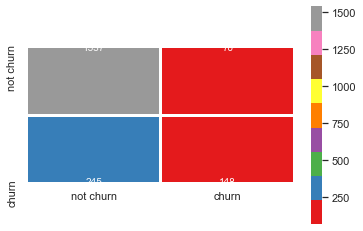

In [85]:
sns.heatmap(conf_matrix,annot=True, fmt = 'd',square = True,
xticklabels=['not churn','churn'],
yticklabels=['not churn','churn'],
linewidths = 2, linecolor = 'w', cmap = 'Set1')
plt.subplots_adjust(wspace = .3, hspace = .3)

## Wrap Up and Conclusions

Using ANN(Artificial Neural Network), it has been demonstrated that significant performance improvement is possible over base ML model in terms of F1 Score - which is very important in our problem statement. 

While the overall goal was not to specifically improve accuracy of prediction, but in reducing erroneous conclusions as a result of bad prediction. ANN showed significant capacity to help achieve the objective over a base ML model.

The ANN model can thus be deployed with confidence in assisting the bank predict customers with higher tendency to Churn or Not churn the services offered by the bank.